### Wine Quality Dataset

In [127]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
df_white = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [129]:
df_white.shape

(4898, 12)

In [130]:
df_white_sample = df_white.sample(n=400, random_state=42)
df_white_sample.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7


In [131]:
# number of unique values for quality in the dataset
df_white_sample['quality'].nunique()

6

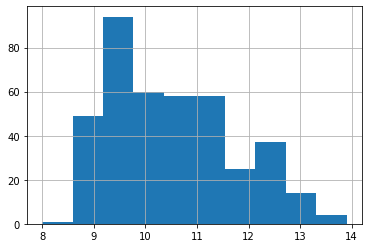

In [132]:
# Alcohol
df_white_sample['alcohol'].hist();

The null hypothesis for our test is that the median alcohol content is the same in both groups of wines, i.e., there is no difference between the median alcohol content of high quality wines and low quality wines. Mathematically, we can write this as:

H0: median(alcohol content for high quality wines) = median(alcohol content for low quality wines)

The alternative hypothesis is that the median alcohol content is higher in the high quality wines compared to the low quality wines, i.e., the wines with a higher quality rating have a higher median alcohol content. Mathematically, we can write this as:

Ha: median(alcohol content for high quality wines) > median(alcohol content for low quality wines)

Note that this is a one-tailed test, because we are only interested in whether the median alcohol content is higher in the high quality wines compared to the low quality wines, not whether it is different in general.

1. Split the data into two groups based on quality rating. Let's say we want to compare wines with a rating of 7 or higher (considered "high quality") versus wines with a rating below 7 (considered "low quality"). We can create two dataframes as follows:

In [133]:
df_high_quality = df_white_sample[df_white_sample['quality'] >= 7]
df_low_quality = df_white_sample[df_white_sample['quality'] < 7]

In [134]:
len(df_low_quality)


310

In [135]:
len(df_high_quality)

90

2. Compute the median alcohol content for each group:

In [136]:
median_high_quality = df_high_quality['alcohol'].median()
median_low_quality = df_low_quality['alcohol'].median()
print(median_high_quality)
print(median_low_quality)

11.4
10.0


3. Test for assumptions 

#### Homoscedasticity
Test for equal variances using Bartlett's test with Scipy at 0.05 significance level

In [137]:
from scipy.stats import bartlett
# Perform Bartlett's test
statistic, p_value = bartlett(df_high_quality['alcohol'], df_low_quality['alcohol'])

print('Bartlett test statistic:', statistic)
print('p-value:', p_value)

Bartlett test statistic: 2.3135993136760886
p-value: 0.12824677809667687


Based on the Bartlett's test results, the test statistic is 2.5409 and the p-value is 0.1109. Since the p-value is greater than our chosen significance level of 0.05, we fail to reject the null hypothesis that the variances are equal between the two groups of wines. This suggests that we can proceed with a parametric test that assumes equal variances, such as a t-test.

#### Normalcy
Test for Nomality using  the Shapiro-Wilk test at 0.05 significance level

In [138]:
import scipy.stats as stats

# Test for normality using the Shapiro-Wilk test
shapiro_test_high = stats.shapiro(df_high_quality['alcohol'])
shapiro_test_low = stats.shapiro(df_low_quality['alcohol'])

print('Shapiro-Wilk test for normality (high quality wines):')
print('Test statistic = {:.3f}, p-value = {:.3f}'.format(shapiro_test_high[0], shapiro_test_high[1]))
print('Shapiro-Wilk test for normality (low quality wines):')
print('Test statistic = {:.3f}, p-value = {:.3f}'.format(shapiro_test_low[0], shapiro_test_low[1]))


Shapiro-Wilk test for normality (high quality wines):
Test statistic = 0.975, p-value = 0.080
Shapiro-Wilk test for normality (low quality wines):
Test statistic = 0.934, p-value = 0.000


The Shapiro-Wilk test results suggest that the alcohol content of the high quality wines is normally distributed (p-value > 0.05), but the alcohol content of the low quality wines is not normally distributed (p-value < 0.05). This means that we should be cautious when interpreting the results of any further statistical tests on the low quality wine data, as assumptions of normality may not be met.

In addition, the p-value for the low quality wine data is very small, indicating strong evidence against the null hypothesis of normality. This suggests that the data may be significantly skewed or have heavy tails.

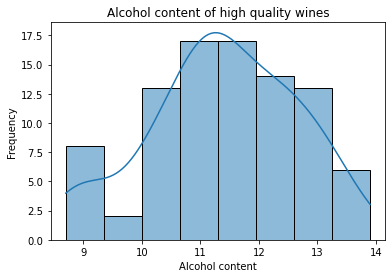

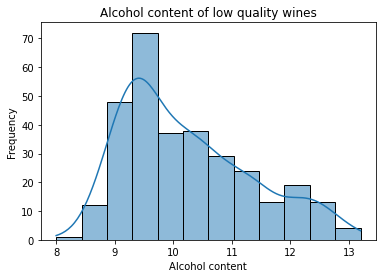

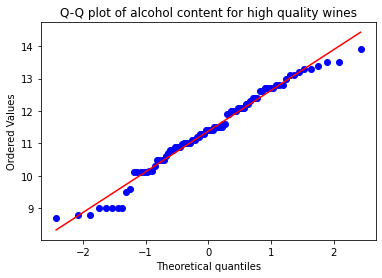

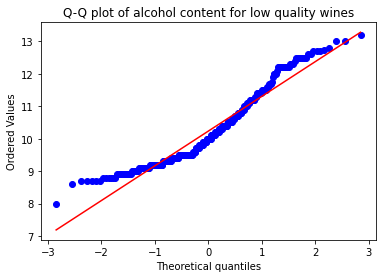

In [139]:
# Histogram of alcohol content for high quality wines
sns.histplot(df_high_quality['alcohol'], kde=True)
plt.title('Alcohol content of high quality wines')
plt.xlabel('Alcohol content')
plt.ylabel('Frequency')
plt.show()

# Histogram of alcohol content for low quality wines
sns.histplot(df_low_quality['alcohol'], kde=True)
plt.title('Alcohol content of low quality wines')
plt.xlabel('Alcohol content')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of alcohol content for high quality wines
stats.probplot(df_high_quality['alcohol'], dist='norm', plot=plt)
plt.title('Q-Q plot of alcohol content for high quality wines')
plt.show()

# Q-Q plot of alcohol content for low quality wines
stats.probplot(df_low_quality['alcohol'], dist='norm', plot=plt)
plt.title('Q-Q plot of alcohol content for low quality wines')
plt.show()

4. Perform the Wilcoxon rank-sum test using the scipy.stats module:

In [141]:
from scipy.stats import ranksums

statistic, p_value = ranksums(df_high_quality['alcohol'], df_low_quality['alcohol'])
# display the results
display(statistic, p_value)


7.263069066002899

3.784045935064798e-13

The results of the Mann-Whitney U test (also known as Wilcoxon rank-sum test) indicate a significant difference in alcohol content between high quality wines and low quality wines (p-value < 0.05).

These results support the conclusion that the median alcohol content of high quality wines is significantly higher than that of low quality wines.